In [220]:
import pandas as pd
import matplotlib.pyplot as plt

In [221]:
archivo_original = 'vacunas_covid.csv'
archivo_limpiado = 'vacunas_covid-limpio.csv'
carpeta_imagenes = 'imagenes'

In [222]:
ds = pd.read_csv(archivo_original)
ds.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210227,c7ba6f9424c59a543e8803495c1061db,PERSONAL DE SALUD,39.0,MASCULINO,20210225,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO
1,20210227,51ffbe83478f1e64da17fe2756a9594b,PERSONAL DE SALUD,37.0,FEMENINO,20210219,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ
2,20210227,54048fe3b06c35f14350d7e81340bdbd,PERSONAL DE SALUD,44.0,MASCULINO,20210220,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ
3,20210227,746ad64c513b5d53b987ed48a6b45f77,PERSONAL DE SALUD,54.0,FEMENINO,20210220,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,JOSE LEONARDO ORTIZ
4,20210227,80f0a41dd63af3b96d4a80bfab2eaa61,PERSONAL DE SALUD,35.0,FEMENINO,20210225,1,SINOPHARM,LAMBAYEQUE,LAMBAYEQUE,CHICLAYO,CHICLAYO


In [223]:
ds.describe()

,FECHA_CORTE,EDAD,FECHA_VACUNACION,DOSIS
count,265608.0,265502.000000,2.656080e+05,265608.0
mean,20210227.0,41.781644,2.021022e+07,1.0
std,0.0,11.828207,5.332878e+00,0.0
min,20210227.0,18.000000,2.021021e+07,1.0
25%,20210227.0,32.000000,2.021021e+07,1.0
50%,20210227.0,40.000000,2.021022e+07,1.0
75%,20210227.0,50.000000,2.021022e+07,1.0
max,20210227.0,75.000000,2.021023e+07,1.0


In [224]:
sin_edad = pd.isnull(ds['EDAD'])
numOfRows = len(sin_edad[sin_edad == True].index)
print('Personas sin edad : ', numOfRows)

Personas sin edad :  106


In [225]:
sin_sexo = pd.isnull(ds['SEXO'])
numOfRows = len(sin_sexo[sin_sexo == True].index)
print('Personas sin sexo : ', numOfRows)

Personas sin sexo :  889


In [226]:
ds_sin_vacios = ds.dropna()

In [227]:
hombres = ds_sin_vacios.apply(lambda x: True if x['SEXO'] == 'MASCULINO' else False , axis=1)
hombres_numOfRows = len(hombres[hombres == True].index)
print('Hombres : ', hombres_numOfRows)

Hombres :  89681


In [228]:
mujeres = ds_sin_vacios.apply(lambda x: True if x['SEXO'] == 'FEMENINO' else False , axis=1)
mujeres_numOfRows = len(mujeres[mujeres == True].index)
print('Mujeres : ', mujeres_numOfRows)

Mujeres :  175027


In [229]:
vacunas_por_sexo = ds_sin_vacios['SEXO'].value_counts()

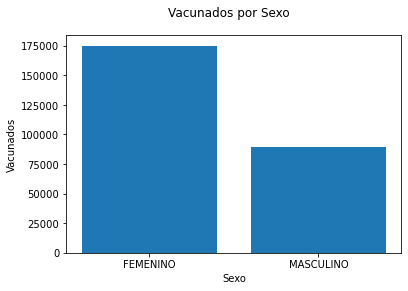

In [230]:
names = vacunas_por_sexo.index
values = vacunas_por_sexo.values
plt.bar(names, values)
plt.xlabel('Sexo')
plt.ylabel('Vacunados')
plt.suptitle('Vacunados por Sexo')
plt.savefig(carpeta_imagenes + '/' + 'Vacunados por Sexo.png')
plt.show()

In [231]:
vacunas_por_departamento = ds_sin_vacios['DEPARTAMENTO'].value_counts()
print(type(vacunas_por_departamento))
print(vacunas_por_departamento)

<class 'pandas.core.series.Series'>
LIMA             92018
AREQUIPA         14078
LA LIBERTAD      13941
PIURA            11557
CALLAO           11308
JUNIN            10625
CUSCO            10268
LAMBAYEQUE        9097
CAJAMARCA         8440
ANCASH            8299
ICA               8062
AYACUCHO          7099
PUNO              7074
SAN MARTIN        6886
HUANUCO           6819
APURIMAC          6003
LORETO            5422
HUANCAVELICA      4678
AMAZONAS          4366
UCAYALI           4267
TACNA             3993
MOQUEGUA          3471
PASCO             2913
TUMBES            2512
MADRE DE DIOS     1512
Name: DEPARTAMENTO, dtype: int64


In [232]:
departamentos = vacunas_por_departamento.index
print (departamentos)

Index(['LIMA', 'AREQUIPA', 'LA LIBERTAD', 'PIURA', 'CALLAO', 'JUNIN', 'CUSCO',
       'LAMBAYEQUE', 'CAJAMARCA', 'ANCASH', 'ICA', 'AYACUCHO', 'PUNO',
       'SAN MARTIN', 'HUANUCO', 'APURIMAC', 'LORETO', 'HUANCAVELICA',
       'AMAZONAS', 'UCAYALI', 'TACNA', 'MOQUEGUA', 'PASCO', 'TUMBES',
       'MADRE DE DIOS'],
      dtype='object')


In [233]:
values = vacunas_por_departamento.values
print (values)

[92018 14078 13941 11557 11308 10625 10268  9097  8440  8299  8062  7099
  7074  6886  6819  6003  5422  4678  4366  4267  3993  3471  2913  2512
  1512]


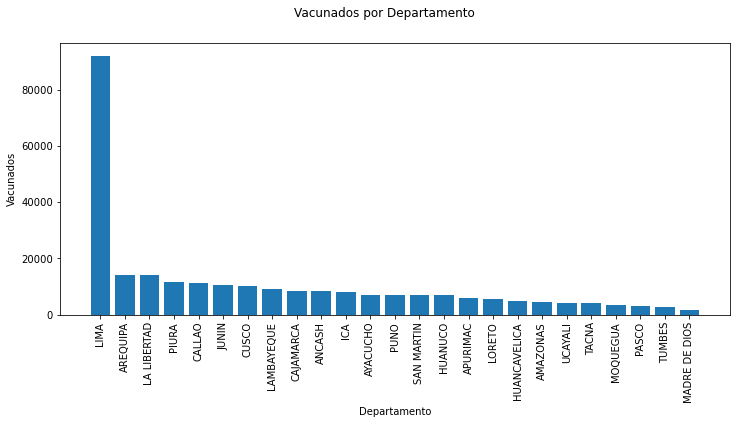

In [234]:
plt.figure(figsize=(12, 5))
plt.bar(departamentos, values)

plt.xticks(rotation=90)
plt.xlabel('Departamento')
plt.ylabel('Vacunados')
plt.suptitle('Vacunados por Departamento')
plt.savefig(carpeta_imagenes + '/' +'Vacunados por Departamento.png')
plt.show()

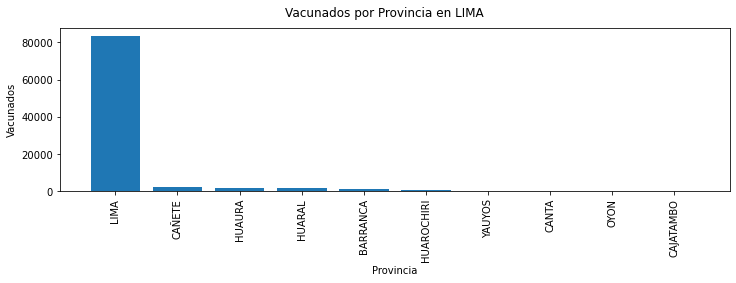

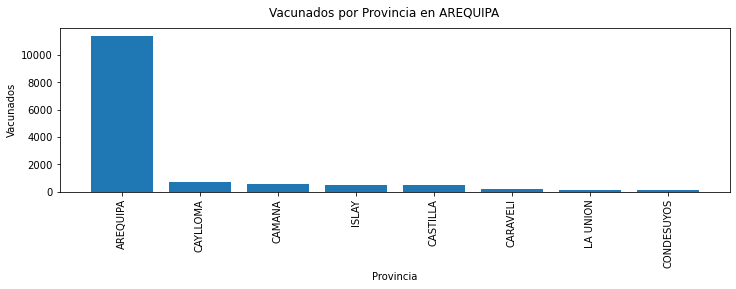

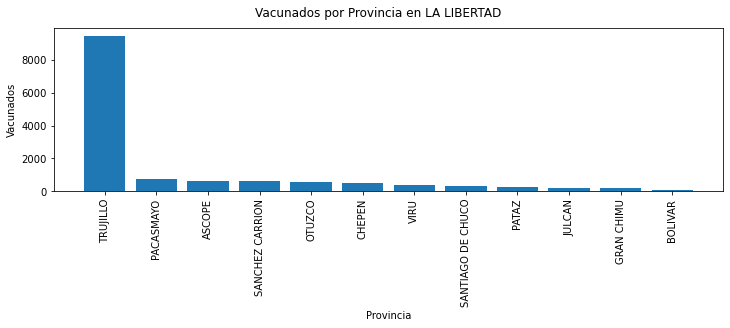

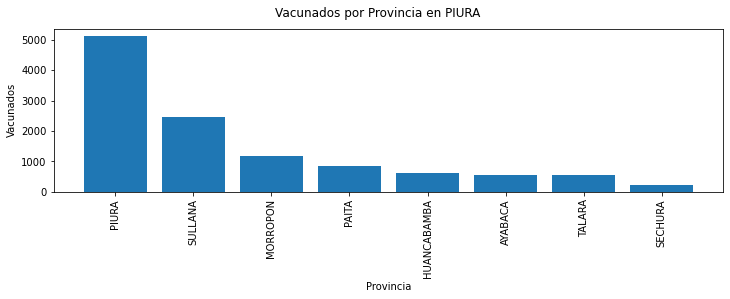

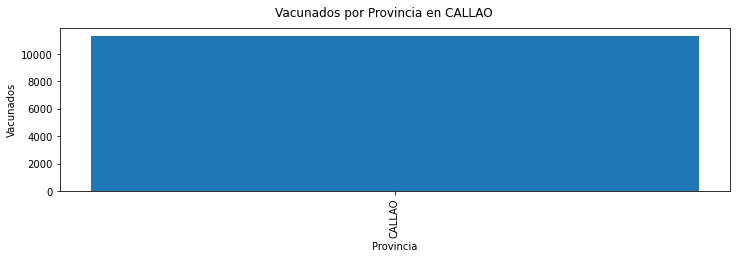

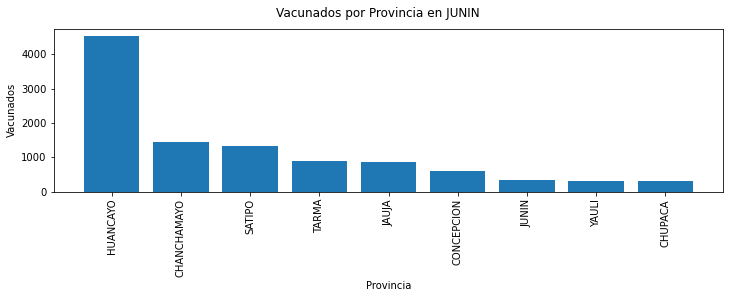

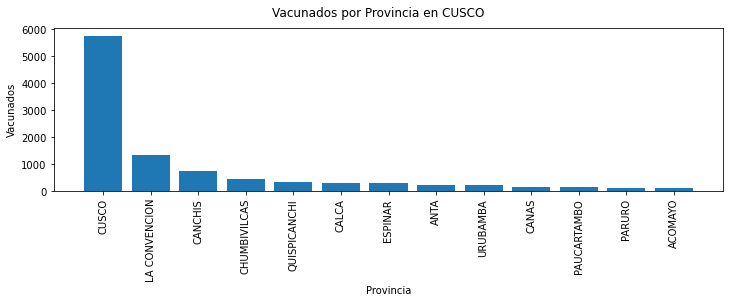

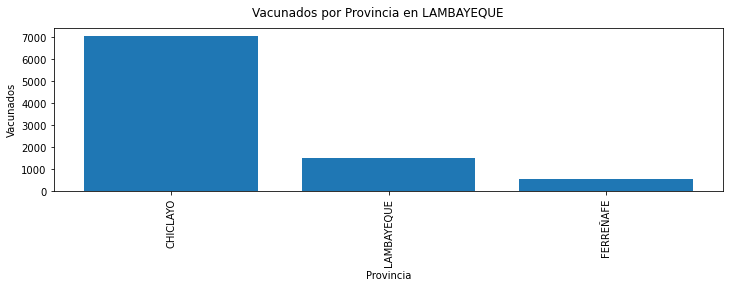

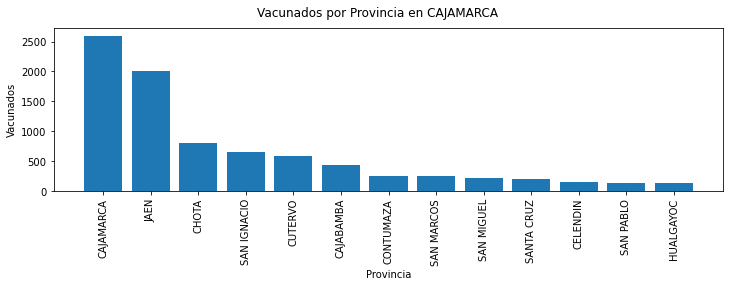

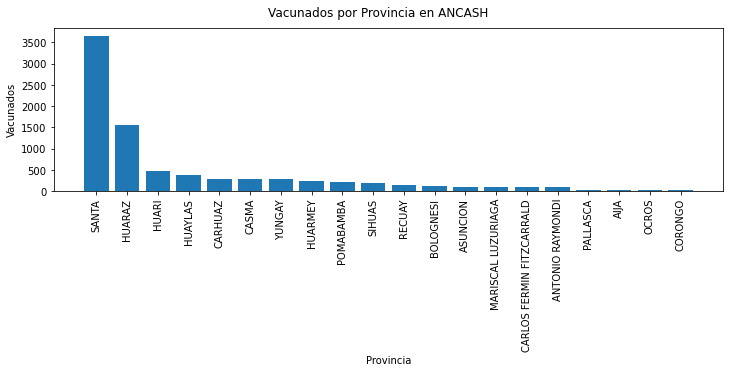

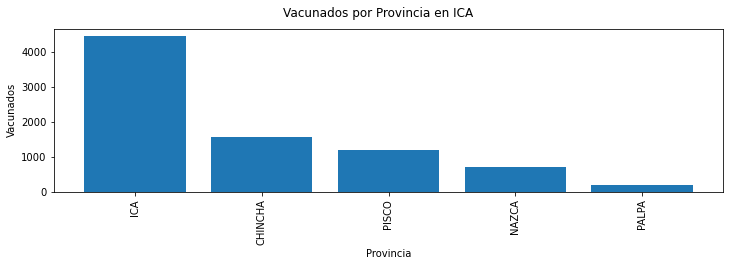

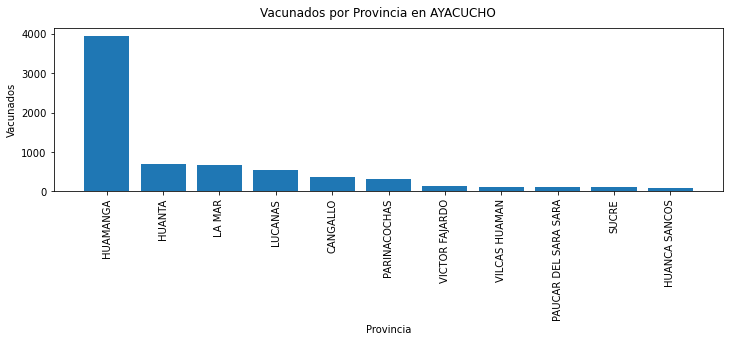

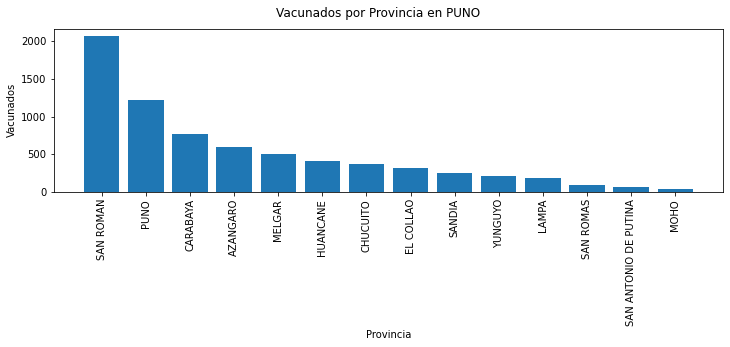

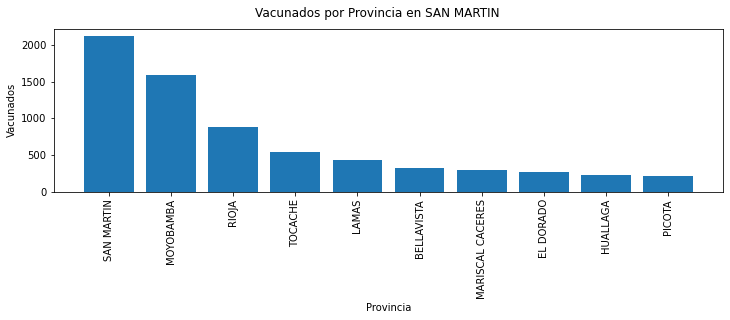

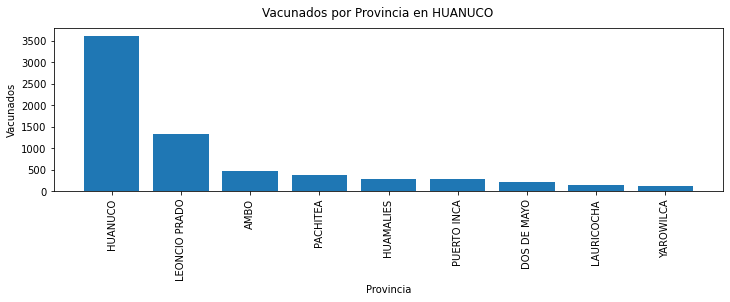

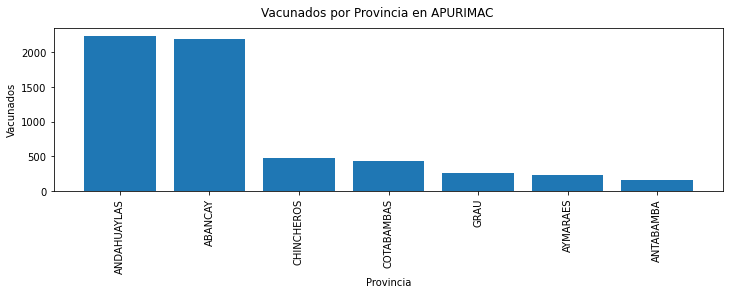

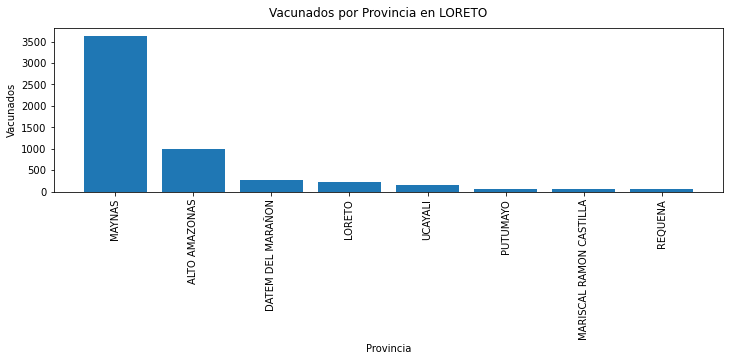

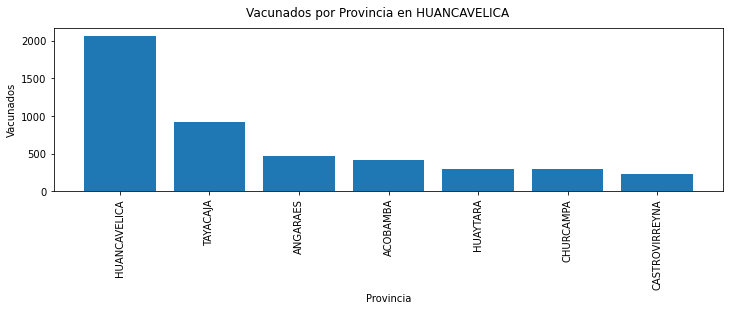

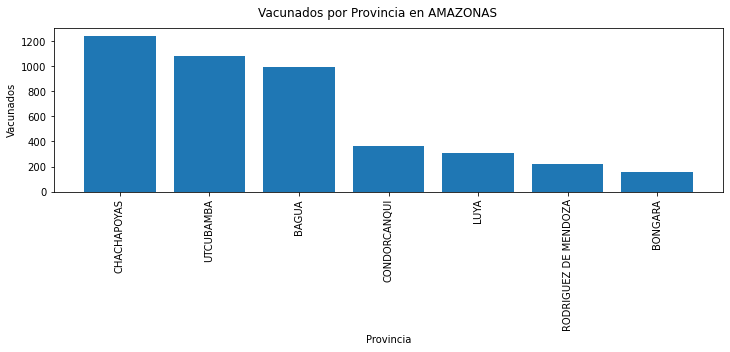

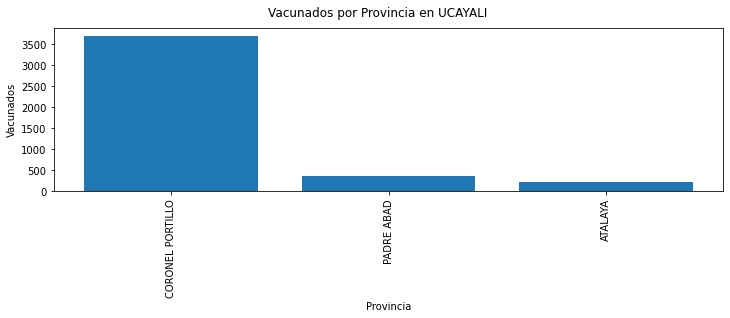

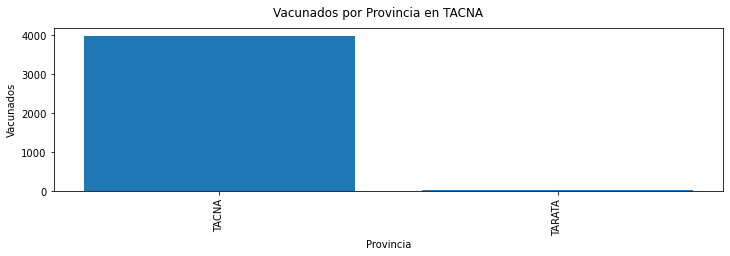

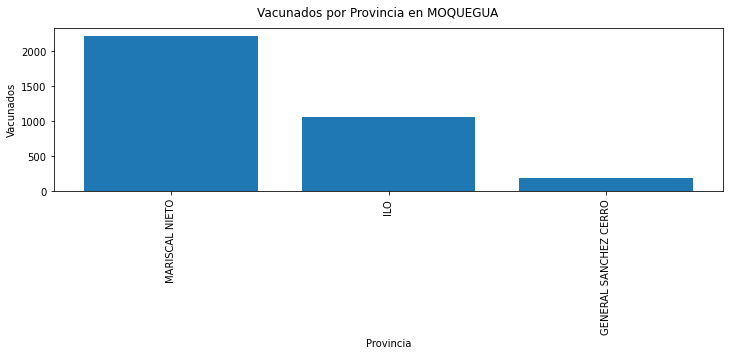

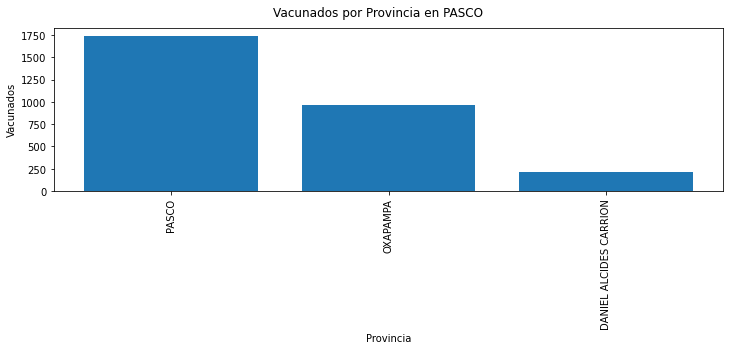

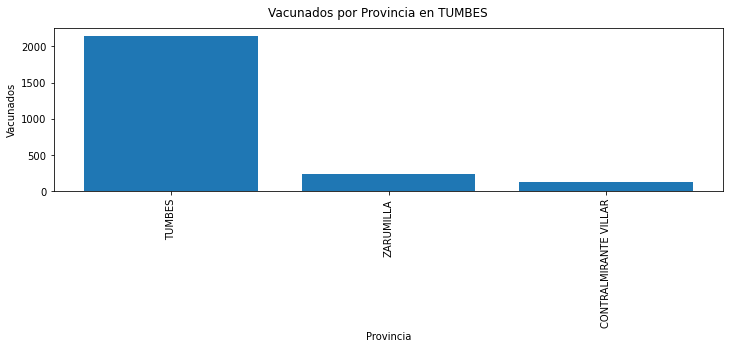

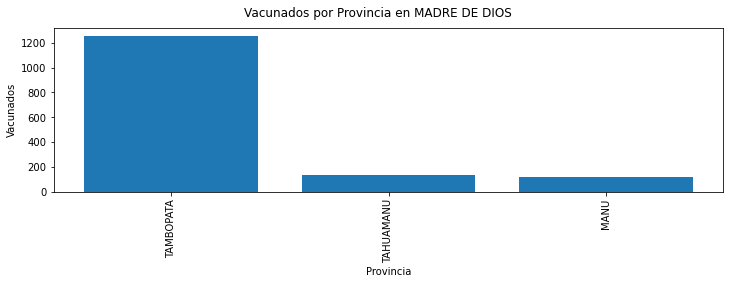

In [235]:
for index, value in vacunas_por_departamento.items():
    departamento = index
    titulo = 'Vacunados por Provincia en ' + departamento
    archivo = carpeta_imagenes + '/' + titulo + '.png'
    son_vacunas_departamento = ds_sin_vacios['DEPARTAMENTO']== departamento
    vacunas_departamento = ds_sin_vacios[son_vacunas_departamento]
    vacunas_por_provincia = vacunas_departamento['PROVINCIA'].value_counts()
    names = vacunas_por_provincia.index
    values = vacunas_por_provincia.values
    plt.figure(figsize=(12, 3))
    plt.bar(names, values)
    plt.xticks(rotation=90)
    plt.xlabel('Provincia')
    plt.ylabel('Vacunados')
    plt.suptitle(titulo)
    plt.savefig(archivo)
    plt.show()

In [236]:
#Guardar archivo corregido
ds_sin_vacios.to_csv(archivo_limpiado, index=False)